In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem  import WordNetLemmatizer
from nltk import pos_tag

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [3]:
file

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
file.groupby(by = 'label').count()

,text
label,
ham,4825
spam,747


<Axes: xlabel='count', ylabel='label'>

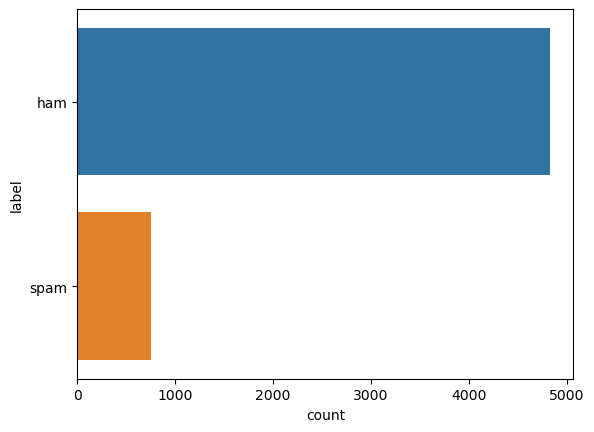

In [5]:
sns.countplot(y=file['label'])

In [6]:
data = file['text'].to_list()
data = ''.join(data)

In [7]:
# token = word_tokenize(data)

In [8]:
sent = 'Hello friends! How are you? Welcome to Python Programming '

ls= LancasterStemmer()

In [9]:
token = word_tokenize(sent)

wln = WordNetLemmatizer()

        
tags = pos_tag(token)
token3 = []
for word in tags:
    if word[1].startswith('N'):
        token3.append(wln.lemmatize(word[0],pos='n'))
    if word[1].startswith('V'):
        token3.append(wln.lemmatize(word[0],pos='v'))
    if word[1].startswith('R'):
        token3.append(wln.lemmatize(word[0],pos='r'))
    if word[1].startswith('J'):
        token3.append(wln.lemmatize(word[0],pos='a'))
        
token3

['Hello', 'friends', 'be', 'Welcome', 'Python', 'Programming']

In [10]:
words = [word.lower() for word in token if word not in string.punctuation]  #Removing punctuations

words = [ls.stem(word) for word in words if word not in stopwords.words('english')]  #Removing Stopwords

In [11]:
words

['hello', 'friend', 'welcom', 'python', 'program']

In [12]:
def clean_text(text):
    words1 = word_tokenize(text)
    
    words2 = [word.lower() for word in words1 if word.isalpha() or word.isdigit()]  #Removing punctuations

    words3 = [ls.stem(word) for word in words2 if word not in stopwords.words('english')]  #Removing Stopwords
    
    tags = pos_tag(words3)

    token3 = []
    
    for word in tags:
        if word[1].startswith('N'):
            token3.append(wln.lemmatize(word[0],pos='n'))
        if word[1].startswith('V'):
            token3.append(wln.lemmatize(word[0],pos='v'))
        if word[1].startswith('R'):
            token3.append(wln.lemmatize(word[0],pos='r'))
        if word[1].startswith('J'):
            token3.append(wln.lemmatize(word[0],pos='a'))

    return token3
    

In [15]:
file['text'].apply(lambda x: clean_text(x))

0       [go, jurong, point, crazy, avail, bug, gre, wo...
1                                  [ok, lar, jok, wif, u]
2       [fre, entry, wkly, comp, win, fa, cup, fin, tk...
3             [u, dun, say, ear, hor, u, c, already, say]
4                             [nah, think, goe, usf, liv]
                              ...                        
5567    [tim, tri, contact, u, pound, priz, claim, eas...
5568                        [ü, b, go, esplanad, fr, hom]
5569                                [pity, mood, suggest]
5570    [guy, bitch, act, lik, interest, buy, someth, ...
5571                                     [rofl, tru, nam]
Name: text, Length: 5572, dtype: object

### TF*IDF VECTORIZER

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [18]:
x_vect = tfidf.fit_transform(file['text'])

In [19]:
x_vect

<5572x5134 sparse matrix of type '<class 'numpy.float64'>'
	with 42348 stored elements in Compressed Sparse Row format>

In [20]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zouk', 'é', 'ü'], dtype=object)

In [21]:
y  = file['label']

In [22]:
#####  CROSS VALIDATION METHOD  ################

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_vect,y, random_state=0,test_size=0.25,stratify=y)

In [25]:
x_train.shape

(4179, 5134)

In [26]:
x_test.shape

(1393, 5134)

### Build the model

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [28]:
classifier = SVC(kernel='linear')

In [29]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)

0.9741564967695621

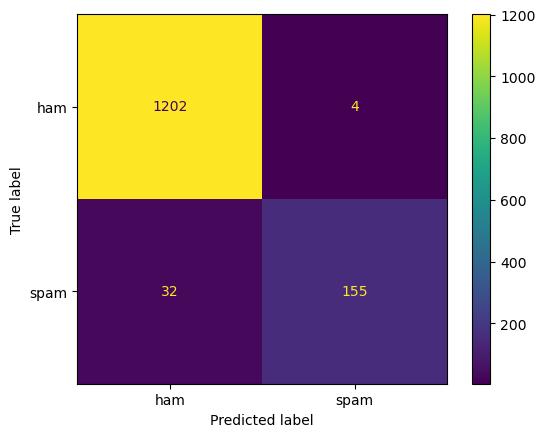

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1206
        spam       0.97      0.83      0.90       187

    accuracy                           0.97      1393
   macro avg       0.97      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [34]:
text =pd.read_csv('sample.csv',names=['text'],sep='\t')

text

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [35]:
tfidf.transform(text['text'])

<3x5134 sparse matrix of type '<class 'numpy.float64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [36]:
classifier.predict(tfidf.transform(text['text']))

array(['ham', 'spam', 'ham'], dtype=object)